<a href="https://colab.research.google.com/github/Swayms-stack/TSF-TASKS/blob/main/Predict_the_percentage_of_a_student_based_on_the_no_of_study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SWAYAMSHREE MOHANTY***

***Predict the percentage of an student based on the no. of study hours.***

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the file into Google Colab drive
from google.colab import files 
# Import io, which opens the file from the Colab drive
import io
%matplotlib inline
print ('Modules Imported')

Modules Imported


In [2]:
# Uploading the dataset
uploaded = files.upload ()

Saving STUDY HOURS.csv to STUDY HOURS (3).csv


In [3]:
# Loading the dataset
df = pd.read_csv(io.BytesIO(uploaded.get('STUDY HOURS.csv')))
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Null Values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Shape of the dataset (Number of rows and columns)
df.shape 

(25, 2)

In [6]:
# Column names in list format
list(df)

['Hours', 'Scores']

In [7]:
# Concise summary of the DataFrame
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Statistical Summary of the DataFrame
df.describe ()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


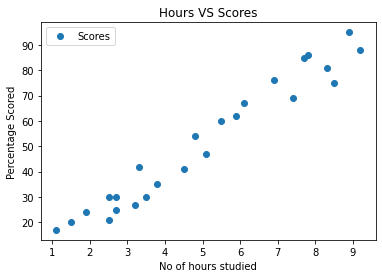

'From the graph, we can infer that there is a positive linear relation between the number of hours studied and percentage scored.'

In [9]:
# Plotting the score distribution
df.plot (x = 'Hours', y = 'Scores', style = 'o')
plt.title ('Hours VS Scores')
plt.xlabel ('No of hours studied')
plt.ylabel ('Percentage Scored')
plt.show ()

'''From the graph, we can infer that there is a positive linear relation between the number of hours studied and percentage scored.'''

***Data Preparation***

In [10]:
# Dividing the data into attributes (inputs) and labels (outputs) using .iloc[]
x = df.iloc [:, :-1].values
y = df.iloc [:, 1].values

In [11]:
# Splitting the data into training and test sets using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']], y,test_size=0.2, random_state=0)

***Training***

In [12]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression  
r = LinearRegression ()  
r.fit(x_train, y_train) 
print('Training Completed')

Training Completed


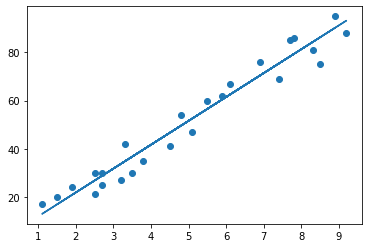

In [13]:
# Plotting the regression line
line = r.coef_*x + r.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

*y = m*x + c

y = dependent variable

x = independent variable

m = slope of line

c = intercept of line*

***Prediction***

In [14]:
# Testing the data 
print (x_test)   # In Hours
y_pr = r.predict (x_test)  # Score Prediction

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [15]:
# Comparision of Actual VS Predicted Scores
df = pd.DataFrame ({'Actual_Score' : y_test, 'Predicted_Score' : y_pr})
df

,Actual_Score,Predicted_Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***MODEL EVALUATION***

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error (y_test, y_pr))
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pr))
print('Root Mean Squared Error:', np.sqrt (metrics.mean_squared_error(y_test, y_pr)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
